## RECURRENT NEURAL NETWORK 

## SINE WAVE 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import pandas as pd

Creating a Sine wave

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

Plotting the graph

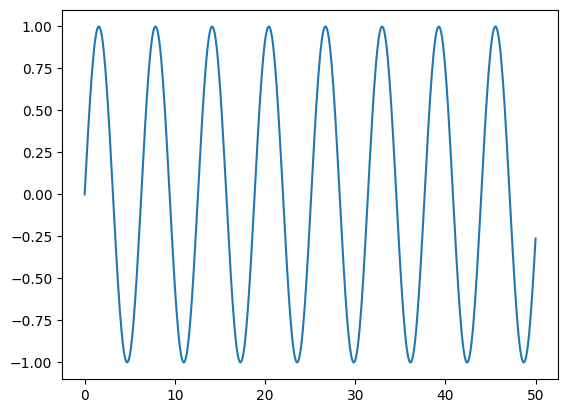

In [5]:
plt.plot(x,y);

Making a dataframe 

In [6]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [8]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


Splitting the Data

In [9]:
test_percent = 0.1
test_point = np.round(len(df)*test_percent)
test_ind = int(len(df) - test_point)

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

Scaling the data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaler.fit(train)

StandardScaler()

In [17]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Importing the Time Series Generator

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [20]:
X,y = generator[0]

In [24]:
print(f'Given the Array: {X.flatten()}')
print(f'Predict this y: {y}')

Given the Array: [-0.01629415  0.12565687]
Predict this y: [[0.26618956]]


Redifining it 

In [25]:
# redifining it to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [27]:
X,y = generator[0]
print(f'Given the Array: {X.flatten()}')
print(f'Predict this y: {y}')

Given the Array: [-0.01629415  0.12565687  0.26618956  0.40389976  0.53741153  0.66539085
  0.786559    0.89970531  1.00369925  1.09750176]
Predict this y: [[1.18017558]]


In [28]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

### Building the RNN

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [30]:
n_features = 1

In [31]:
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training

In [33]:
model.fit_generator(generator,epochs=10)

Epoch 1/10


/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_38099/3818026791.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10)


401/401 [==============================] - 1s 2ms/step - loss: 0.0187
Epoch 2/10
401/401 [==============================] - 1s 2ms/step - loss: 6.5008e-05
Epoch 3/10
401/401 [==============================] - 1s 2ms/step - loss: 0.0018
Epoch 4/10
401/401 [==============================] - 1s 2ms/step - loss: 2.3951e-04
Epoch 5/10
401/401 [==============================] - 1s 2ms/step - loss: 4.7824e-04
Epoch 6/10
401/401 [==============================] - 1s 2ms/step - loss: 3.5837e-04
Epoch 7/10
401/401 [==============================] - 1s 2ms/step - loss: 7.1563e-04
Epoch 8/10
401/401 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 9/10
401/401 [==============================] - 1s 2ms/step - loss: 7.9960e-05
Epoch 10/10
401/401 [==============================] - 1s 2ms/step - loss: 5.2407e-05


In [34]:
model.history.history

{'loss': [0.01871591806411743,
  6.500803283415735e-05,
  0.0018480827566236258,
  0.00023950655304361135,
  0.0004782410687766969,
  0.00035836725146509707,
  0.0007156263454817235,
  0.0019043474458158016,
  7.996015483513474e-05,
  5.24067145306617e-05]}

<Axes: >

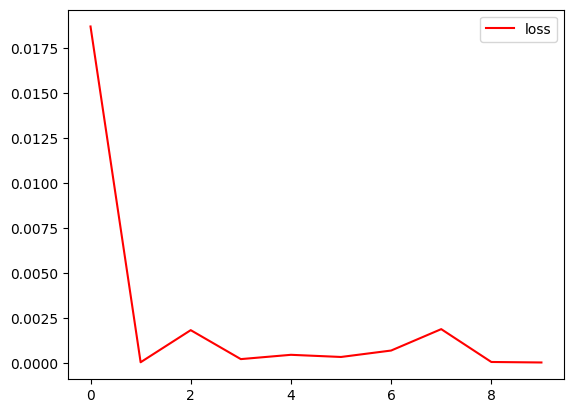

In [39]:
loss_rnn = pd.DataFrame(model.history.history)
loss_rnn.plot(color='red')

## Evaluation

In [40]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[ 0.94320101],
       [ 0.83364863],
       [ 0.7156039 ],
       [ 0.59024628],
       [ 0.45882832],
       [ 0.32266308],
       [ 0.1831111 ],
       [ 0.04156673],
       [-0.10055577],
       [-0.24183636],
       [-0.3808634 ],
       [-0.51624778],
       [-0.6466368 ],
       [-0.77072764],
       [-0.88728043],
       [-0.99513061],
       [-1.09320058],
       [-1.18051046],
       [-1.25618788],
       [-1.31947669],
       [-1.36974452],
       [-1.40648913],
       [-1.42934337],
       [-1.43807889],
       [-1.43260841],
       [-1.41298658],
       [-1.37940946],
       [-1.33221255],
       [-1.27186741],
       [-1.198977  ],
       [-1.11426962],
       [-1.01859162],
       [-0.912899  ],
       [-0.79824781],
       [-0.67578359],
       [-0.54672997],
       [-0.41237641],
       [-0.27406532],
       [-0.13317868],
       [ 0.00887584],
       [ 0.15067887],
       [ 0.29081356],
       [ 0.42787973],
       [ 0.56050786],
       [ 0.68737278],
       [ 0

In [41]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

Prediction values are almost same

In [42]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 85ms/step


array([[1.2520713]], dtype=float32)

In [43]:
scaled_test[0]

array([1.26211313])

Evaluation on the Test

In [44]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [45]:
current_batch.shape

(1, 50, 1)

In [46]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 8.33648629e-01],
        [ 7.15603898e-01],
        [ 5.90246283e-01],
        [ 4.58828317e-01],
        [ 3.22663084e-01],
        [ 1.83111103e-01],
        [ 4.15667296e-02],
        [-1.00555770e-01],
        [-2.41836355e-01],
        [-3.80863398e-01],
        [-5.16247784e-01],
        [-6.46636800e-01],
        [-7.70727640e-01],
        [-8.87280430e-01],
        [-9.95130612e-01],
        [-1.09320058e+00],
        [-1.18051046e+00],
        [-1.25618788e+00],
        [-1.31947669e+00],
        [-1.36974452e+00],
        [-1.40648913e+00],
        [-1.42934337e+00],
        [-1.43807889e+00],
        [-1.43260841e+00],
        [-1.41298658e+00],
        [-1.37940946e+00],
        [-1.33221255e+00],
        [-1.27186741e+00],
        [-1.19897700e+00],
        [-1.11426962e+00],
        [-1.01859162e+00],
        [-9.12899005e-01],
        [-7.98247807e-01],
        [-6.75783587e-01],
        [-5.46729967e-01],
        [-4.12376407e-01],
        [-2.74065324e-01],
 

In [47]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 8ms/step


## Inverse Transformations

In [48]:
true_predictions = scaler.inverse_transform(test_predictions)

In [49]:
test['Predictions'] = true_predictions

/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_38099/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


## The SINE Plot

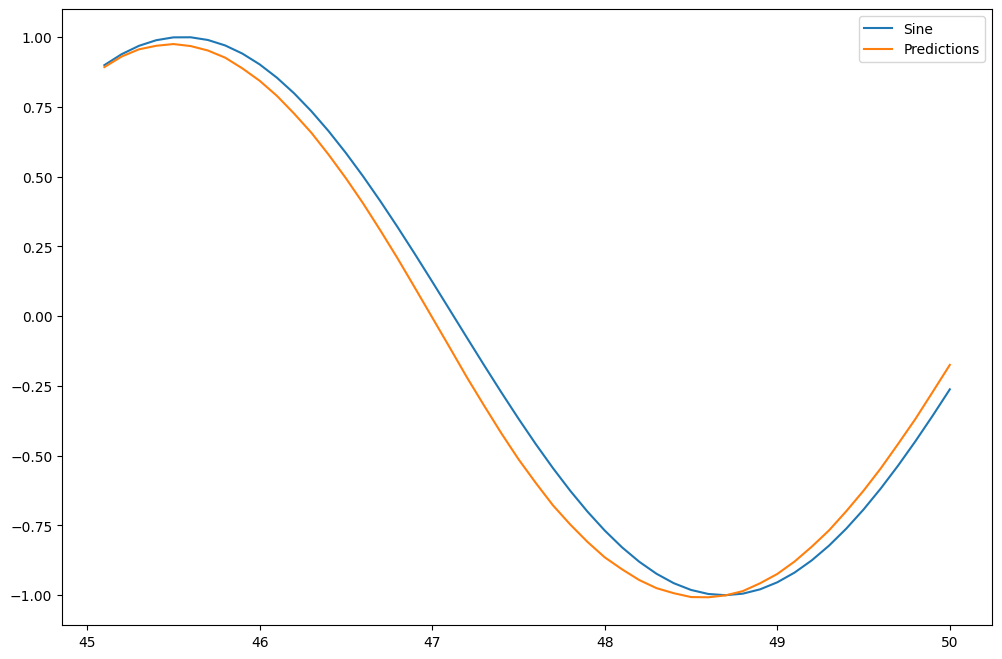

In [50]:
test.plot(figsize=(12,8));

## Using EarlyStopping and Validation Generator

In [51]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [52]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

## Adding Long Short Term Memory (LSTM)

In [53]:
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [54]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20


/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_38099/1950115197.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


402/402 [==============================] - 2s 4ms/step - loss: 0.0524 - val_loss: 4.7249e-06
Epoch 2/20
402/402 [==============================] - 1s 4ms/step - loss: 2.2951e-04 - val_loss: 0.0013
Epoch 3/20
402/402 [==============================] - 1s 4ms/step - loss: 0.0027 - val_loss: 5.9272e-04


In [55]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 8ms/step


In [56]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions

/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_38099/250508047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


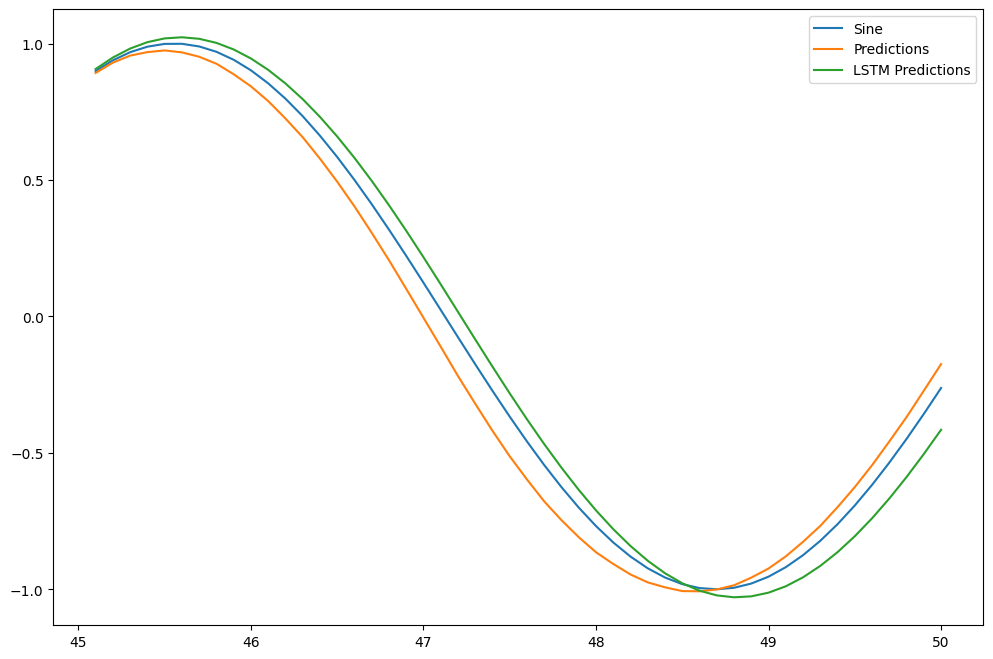

In [57]:
test.plot(figsize=(12,8));

### Forecasting an unkown Range

In [58]:
full_scaler = StandardScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [59]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [61]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=10)

Epoch 1/10


/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_38099/2929448018.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10)


451/451 [==============================] - 2s 4ms/step - loss: 0.0432
Epoch 2/10
451/451 [==============================] - 2s 4ms/step - loss: 9.5988e-05
Epoch 3/10
451/451 [==============================] - 2s 4ms/step - loss: 0.0010
Epoch 4/10
451/451 [==============================] - 2s 4ms/step - loss: 0.0027
Epoch 5/10
451/451 [==============================] - 2s 4ms/step - loss: 2.3790e-05
Epoch 6/10
451/451 [==============================] - 2s 4ms/step - loss: 2.6058e-05
Epoch 7/10
451/451 [==============================] - 2s 4ms/step - loss: 4.9561e-04
Epoch 8/10
451/451 [==============================] - 2s 4ms/step - loss: 8.4083e-04
Epoch 9/10
451/451 [==============================] - 2s 4ms/step - loss: 1.9582e-04
Epoch 10/10
451/451 [==============================] - 2s 4ms/step - loss: 9.8838e-05


In [62]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 9ms/step


In [63]:
forecast = scaler.inverse_transform(forecast)

In [64]:
forecast_index = np.arange(50.1,55.1,step=0.1)

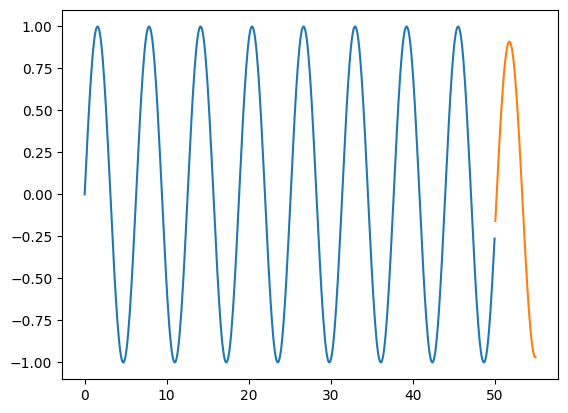

In [65]:
plt.plot(df.index,df['Sine']);
plt.plot(forecast_index,forecast);